<a href="https://colab.research.google.com/github/yfb2022/STAT_DL_INTRO/blob/main/4_4_overfitting_and_underfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
keras.__version__

'2.15.0'

# Overfitting and underfitting

과적합은 모든 기계 학습 문제에서 발생. 과적합을 처리하는 방법을 배우는 것은 기계 학습을 마스터하는 데 필수적임.

머신러닝의 근본적인 문제는 최적화와 일반화 사이의 Trade-off

"최적화"는 훈련 데이터에서 가능한 최고의 성능을 얻기 위해 모델을 조정하는 프로세스

"일반화"는 훈련된 모델이 보유한 데이터에서 얼마나 잘 수행되는지를 의미.

목표 : 훈련 데이터 기반으로 모델을 조정하여 좋은 일반화를 얻는 것

학습 초기에는 학습 데이터의 손실이 낮을수록 테스트 데이터의 손실도 낮아지지만 특정 Epoch 이후 성능이 저하되고 과적합되기 시작함. 즉, 학습 데이터에 특정한 패턴을 배우지만 새로운 데이터에 적합하지 않음.

최선의 해결책은 더 많은 훈련 데이터를 얻는 것. 더 많은 데이터에 대해 훈련된 모델은 자연스럽게 더 잘 일반화됩니다. 더 이상 가능하지 않은 경우 차선책은 모델이 저장할 수 있는 정보(파라미터)의 양을 조절하거나 저장할 수 있는 정보(파라미터)에 대한 제약 조건을 추가하는 것.

이러한 방식으로 과적합을 방지하는 처리를 정규화 라고 합니다.

### 일반화와 최적화 사이의 관계를 고려해야하며 오버피팅을 막을 수 있는 방법 중 학습 데이터 증가 / 정규화가 있다.

In [2]:
## 데이터 변환
from keras.datasets import imdb
import numpy as np

# 리스트 배열
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# 벡터화
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels (target)
y_train = np.asarray(train_labels).astype('float32') # as.numeric
y_test = np.asarray(test_labels).astype('float32')

17464789/17464789 [==============================] - 0s 0us/step


# Fighting overfitting

## Reducing the network's size

과적합을 방지하는 가장 간단한 방법은 모델의 크기, 즉 모델에서 학습 가능한 매개변수의 수(레이어 수와 레이어당 단위 수에 의해 결정됨)를 줄이는 것.

딥러닝에서는 모델의 학습 가능한 매개변수 수를 종종 모델의 "용량"이라고 합니다.

직관적으로 더 많은 매개변수를 가진 모델은 더 많은 "기억 용량"을 갖게 되므로 일반화 능력이 없는 매핑인 훈련 샘플과 해당 목표 간의 매핑을 쉽게 학습할 수 있습니다.

이처럼 딥 러닝 모델은 훈련 데이터에 잘 적응하는 경향이 있지만 실제 과제는 피팅이 아니라 일반화임.

반면에 네트워크의 기억 자원이 제한되어 있으면 이 매핑을 쉽게 학습할 수 없으므로 손실을 최소화하기 위해 예측력이 있는 압축 표현을 학습해야 합니다.

또한 동시에 과소적합되지 않을 만큼 충분한 매개변수가 있는 모델을 사용해야 함.

적절한 레이어 수나 각 레이어의 적절한 크기를 결정하는 공식은 없음. 그렇기에 데이터에 적합한 모델 크기를 찾으려면 다양한 아키텍처 배열(물론 테스트 세트가 아닌 검증 세트에서)을 평가해야 함.

적절한 모델 크기를 찾는 일반적인 작업 흐름은 상대적으로 적은 수의 레이어와 매개변수로 시작하여 검증 손실과 관련된 성능이 감소할 때까지 레이어 크기를 늘리거나 새 레이어를 추가하는 것.

In [3]:
# Baseline Network
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

작은 네트워크 모델부터 시작

In [4]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])


Here's a comparison of the validation losses of the original network and the smaller network. The dots are the validation loss values of
the smaller network, and the crosses are the initial network (remember: a lower validation loss signals a better model).

In [5]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 6s 85ms/step - loss: 0.4836 - acc: 0.8054 - val_loss: 0.3686 - val_acc: 0.8705
Epoch 2/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2844 - acc: 0.9033 - val_loss: 0.2899 - val_acc: 0.8892
Epoch 3/20
49/49 [==============================] - 2s 37ms/step - loss: 0.2199 - acc: 0.9222 - val_loss: 0.2849 - val_acc: 0.8866
Epoch 4/20
49/49 [==============================] - 3s 58ms/step - loss: 0.1858 - acc: 0.9338 - val_loss: 0.2980 - val_acc: 0.8791
Epoch 5/20
49/49 [==============================] - 2s 46ms/step - loss: 0.1648 - acc: 0.9403 - val_loss: 0.2932 - val_acc: 0.8849
Epoch 6/20
49/49 [==============================] - 2s 35ms/step - loss: 0.1466 - acc: 0.9496 - val_loss: 0.3068 - val_acc: 0.8814
Epoch 7/20
49/49 [==============================] - 2s 35ms/step - loss: 0.1324 - acc: 0.9545 - val_loss: 0.3652 - val_acc: 0.8659
Epoch 8/20
49/49 [==============================] - 2s 36ms/step - loss: 0.1213 - a

In [6]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 6s 106ms/step - loss: 0.5814 - acc: 0.7376 - val_loss: 0.4993 - val_acc: 0.8316
Epoch 2/20
49/49 [==============================] - 2s 35ms/step - loss: 0.4177 - acc: 0.8766 - val_loss: 0.3874 - val_acc: 0.8694
Epoch 3/20
49/49 [==============================] - 2s 36ms/step - loss: 0.3093 - acc: 0.9073 - val_loss: 0.3191 - val_acc: 0.8857
Epoch 4/20
49/49 [==============================] - 2s 36ms/step - loss: 0.2453 - acc: 0.9206 - val_loss: 0.2901 - val_acc: 0.8905
Epoch 5/20
49/49 [==============================] - 2s 35ms/step - loss: 0.2090 - acc: 0.9311 - val_loss: 0.2807 - val_acc: 0.8894
Epoch 6/20
49/49 [==============================] - 2s 35ms/step - loss: 0.1859 - acc: 0.9382 - val_loss: 0.2812 - val_acc: 0.8869
Epoch 7/20
49/49 [==============================] - 2s 50ms/step - loss: 0.1685 - acc: 0.9438 - val_loss: 0.2830 - val_acc: 0.8871
Epoch 8/20
49/49 [==============================] - 3s 59ms/step - loss: 0.1539 - 

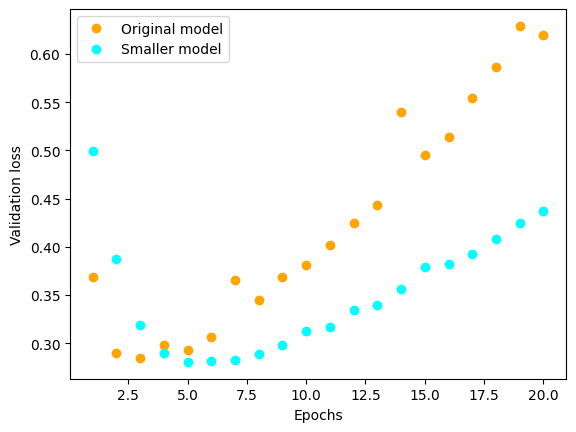

In [14]:
import matplotlib.pyplot as plt

epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

# b+ is for "blue cross"
plt.plot(epochs, original_val_loss, linestyle = 'None', marker = 'o',
         markerfacecolor = 'orange', markeredgecolor = 'orange',
         label='Original model')

# "bo" is for "blue dot"
plt.plot(epochs, smaller_model_val_loss, linestyle = 'None', marker = 'o',
         markerfacecolor = 'cyan', markeredgecolor = 'cyan',
         label='Smaller model')

plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

보시다시피, 작은 네트워크는 참조 네트워크보다 늦게 과적합을 시작하고 과적합이 시작되면 성능이 훨씬 더 느리게 저하.

In [15]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [16]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 24s 486ms/step - loss: 0.4877 - acc: 0.7862 - val_loss: 0.3544 - val_acc: 0.8426
Epoch 2/20
49/49 [==============================] - 21s 427ms/step - loss: 0.2703 - acc: 0.8898 - val_loss: 0.2729 - val_acc: 0.8873
Epoch 3/20
49/49 [==============================] - 23s 465ms/step - loss: 0.2110 - acc: 0.9154 - val_loss: 0.3672 - val_acc: 0.8480
Epoch 4/20
49/49 [==============================] - 24s 488ms/step - loss: 0.1638 - acc: 0.9376 - val_loss: 0.3038 - val_acc: 0.8805
Epoch 5/20
49/49 [==============================] - 23s 473ms/step - loss: 0.1237 - acc: 0.9532 - val_loss: 0.4038 - val_acc: 0.8488
Epoch 6/20
49/49 [==============================] - 18s 378ms/step - loss: 0.0961 - acc: 0.9656 - val_loss: 0.3052 - val_acc: 0.8812
Epoch 7/20
49/49 [==============================] - 18s 361ms/step - loss: 0.0511 - acc: 0.9843 - val_loss: 0.4767 - val_acc: 0.8652
Epoch 8/20
49/49 [==============================] - 20s 422ms/step - 

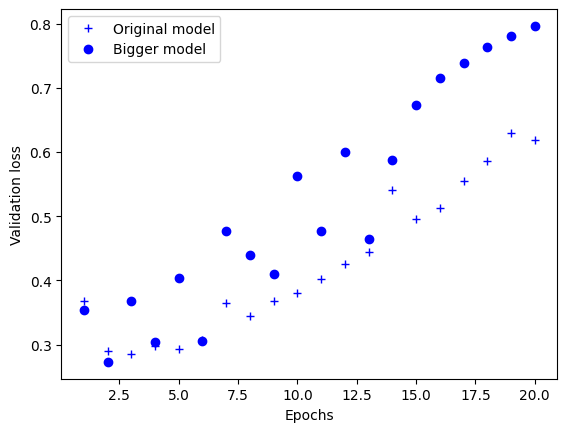

In [17]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

더 큰 네트워크는 한 에포크 이후 거의 즉시 과적합을 시작하고 훨씬 더 심각하게 과적합됩니다. 검증 손실도 더 높습니다.

한편, 두 네트워크의 훈련 손실은 다음과 같습니다.

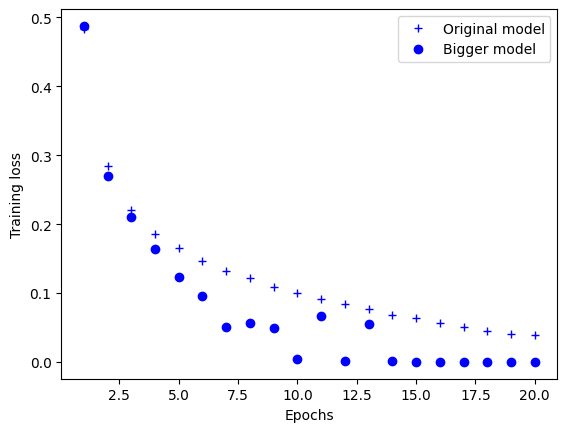

In [18]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

보시다시피, 더 큰 네트워크는 매우 빠르게 훈련 손실을 0에 가깝게 만듭니다. 네트워크의 용량이 많을수록 훈련 데이터를 더 빠르게 모델링할 수 있지만(훈련 손실이 낮음) 과적합에 더 취약합니다

(훈련 손실과 검증 손실 사이에 큰 차이가 발생함).

## Adding weight regularization

어떤 것에 대해 두 가지 설명이 주어지면 가장 정확할 가능성이 가장 높은 설명은 "가장 단순한" 설명, 즉 최소한의 가정을 하는 설명입니다.

이는 신경망에서 학습한 모델에도 적용됩니다.일부 훈련 데이터와 네트워크 아키텍처가 주어지면 데이터를 설명할 수 있는 가중치 값의 여러 세트(다중 모델)가 있고, 단순한 모델은 복잡한 모델보다 과적합될 가능성이 적습니다.

이 맥락에서 "단순 모델"은 매개변수 값의 분포에 엔트로피가 적은 모델(또는 위 섹션에서 본 것처럼 매개변수가 모두 적은 모델)입니다.

따라서 과적합을 완화하는 일반적인 방법은 가중치가 작은 값만 취하도록 강제하여 네트워크의 복잡성에 제약을 가하여 가중치 값의 분포를 보다 "규칙적"으로 만드는 것입니다.

이를 "가중치 정규화"라고 하며, 큰 가중치를 갖는 것과 관련된 비용을 네트워크의 손실 함수에 추가하여 수행됩니다. 이 비용은 두 가지 형태로 나타납니다.

* 추가되는 비용이 가중치 계수의 절대값 (즉, 가중치의 "L1 표준"이라고 불리는 값)에 비례하는 L1 정규화.

* 추가되는 비용이 가중치 계수 값의 제곱 에 비례하는 L2 정규화 (즉, 가중치의 "L2 표준"이라고 함). L2 정규화는 신경망 맥락에서 가중치 감소 라고도 합니다.



In [19]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [20]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

regularizer_l2(0.001)이는 레이어의 가중치 행렬의 모든 계수가 0.001 * weight_coefficient_value로 네트워크의 총 손실에 추가된다는 것을 의미합니다.


In [21]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 8s 145ms/step - loss: 0.5073 - acc: 0.8156 - val_loss: 0.3945 - val_acc: 0.8770
Epoch 2/20
49/49 [==============================] - 2s 37ms/step - loss: 0.3285 - acc: 0.9004 - val_loss: 0.3393 - val_acc: 0.8885
Epoch 3/20
49/49 [==============================] - 2s 36ms/step - loss: 0.2815 - acc: 0.9162 - val_loss: 0.3520 - val_acc: 0.8778
Epoch 4/20
49/49 [==============================] - 2s 51ms/step - loss: 0.2542 - acc: 0.9258 - val_loss: 0.3406 - val_acc: 0.8843
Epoch 5/20
49/49 [==============================] - 3s 52ms/step - loss: 0.2399 - acc: 0.9341 - val_loss: 0.3467 - val_acc: 0.8820
Epoch 6/20
49/49 [==============================] - 2s 49ms/step - loss: 0.2310 - acc: 0.9372 - val_loss: 0.3556 - val_acc: 0.8797
Epoch 7/20
49/49 [==============================] - 2s 36ms/step - loss: 0.2219 - acc: 0.9407 - val_loss: 0.3574 - val_acc: 0.8797
Epoch 8/20
49/49 [==============================] - 2s 36ms/step - loss: 0.2191 - 

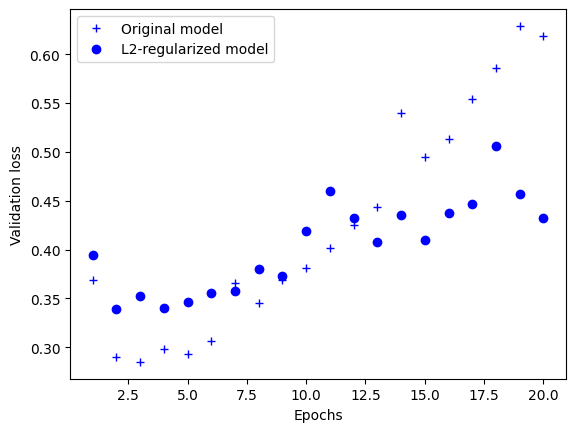

In [22]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

보시다시피, L2 정규화가 적용된 모델은 두 모델 모두 동일한 수의 매개변수를 갖고 있음에도 불구하고 참조 모델보다 과적합에 대한 저항력이 훨씬 더 강해졌습니다.

In [23]:
from keras import regularizers

# L1 regularization
regularizers.l1(0.001)

# L1 and L2 regularization at the same time
regularizers.l1_l2(l1=0.001, l2=0.001)

## Adding dropout

드롭아웃(Dropout)은 Hinton과 그의 동료가 개발한 신경망에 대한 가장 효과적이고 가장 일반적으로 사용되는 정규화 기술 중 하나입니다.

레이어에 적용되는 드롭아웃은 여러 개의 레이어를 무작위로 "드롭아웃"(즉, 0으로 설정)하는 것으로 구성됩니다.

"드롭아웃 비율"은 0으로 처리되는 피처의 비율입니다. 일반적으로 0.2에서 0.5 사이로 설정됩니다. 테스트에선 어떤 유닛도 드롭아웃되지 않고 대신 레이어의 출력 값이 드롭아웃 비율과 동일한 요소로 축소됩니다.



In [ ]:
# At training time: we drop out 50% of the units in the output
# layer_output *= np.random.randint(0, high=2, size=layer_output.shape)

테스트 시 드롭아웃 비율에 따라 출력을 축소합니다. 여기서는 0.5만큼 크기를 조정합니다(이전에는 단위의 절반을 삭제했기 때문입니다).

In [ ]:
# At test time:
# layer_output *= 0.5

이 프로세스는 훈련 시 두 가지 작업을 모두 수행하고 테스트 시 출력을 변경하지 않고 그대로 두는 방식으로 구현될 수 있습니다. 이는 실제로 구현되는 방식인 경우가 많습니다.

In [ ]:
# At training time:
# layer_output *= np.random.randint(0, high=2, size=layer_output.shape)
# Note that we are scaling *up* rather scaling *down* in this case
# layer_output /= 0.5

핵심 아이디어는 레이어의 출력 값에 노이즈를 도입하면 중요하지 않은 우연 패턴을 부술 수 있음.

In [ ]:
# model.add(layers.Dropout(0.5))

Let's add two `Dropout` layers in our IMDB network to see how well they do at reducing overfitting:

In [24]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(rate=0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(rate=0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [ ]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Let's plot the results:

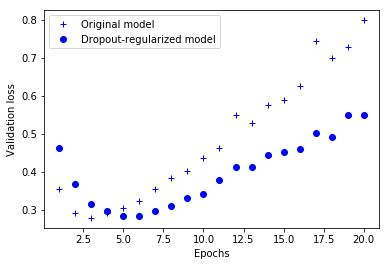

In [ ]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

과적합 방지 프로세스

* Getting more training data.(데이터 증강)
* Reducing the capacity of the network.
(작은 모델부터 시작)
* Adding weight regularization.
(가중치 정규화)
* Adding dropout.
(드랍아웃)